## Import the wrapper and instantiate it with some untrained models

In [6]:
from analysis import ModelAnalysis
model_analysis = ModelAnalysis(models=ModelAnalysis.ALL_MODELS_UNTRAINED)


## Train the models or load the pretrained stored models

In [7]:

# train the models
# model_analysis.train()

## here we just laod the pretrained ones
model_analysis.load_models()

In [8]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict_test()

## Evaluate the predictions using different metrics

In [9]:
# test other metrics
from sklearn.metrics import (max_error, mean_absolute_error,
                             mean_squared_error, median_absolute_error, r2_score)
from utils import root_mean_squared_error

for metric in [mean_squared_error, root_mean_squared_error, r2_score,mean_absolute_error]:
    print(f"{metric.__name__:#^32}")
    _ = model_analysis.evaluate(metric=metric)
    print()

#######mean_squared_error#######
LinearRegression: 378386.29195839464
DecisionTreeRegressor: 7821.351449275362
MLPRegressor: 8631.46489496648
XGBRegressor: 9224.465468064916
RandomForestRegressor: 13936.986046014494
KNeighborsRegressor: 189294.78463768118

####root_mean_squared_error#####
LinearRegression: 615.1311176963775
DecisionTreeRegressor: 88.43840483226369
MLPRegressor: 92.90567740976049
XGBRegressor: 96.04408085907697
RandomForestRegressor: 118.05501279494443
KNeighborsRegressor: 435.0802048331792

############r2_score############
LinearRegression: 0.6641357144362947
DecisionTreeRegressor: 0.9930575904241733
MLPRegressor: 0.9923385152899913
XGBRegressor: 0.9918121544834416
RandomForestRegressor: 0.9876292139521516
KNeighborsRegressor: 0.8319776404313799

######mean_absolute_error#######
LinearRegression: 308.50891367827575
DecisionTreeRegressor: 34.51086956521739
MLPRegressor: 54.887950197070346
XGBRegressor: 42.01274177345677
RandomForestRegressor: 43.684384057971016
KNeighbo

## Visualize the predicitons

/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:95: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(pred_df['Y'], alpha=.9, ax=ax,


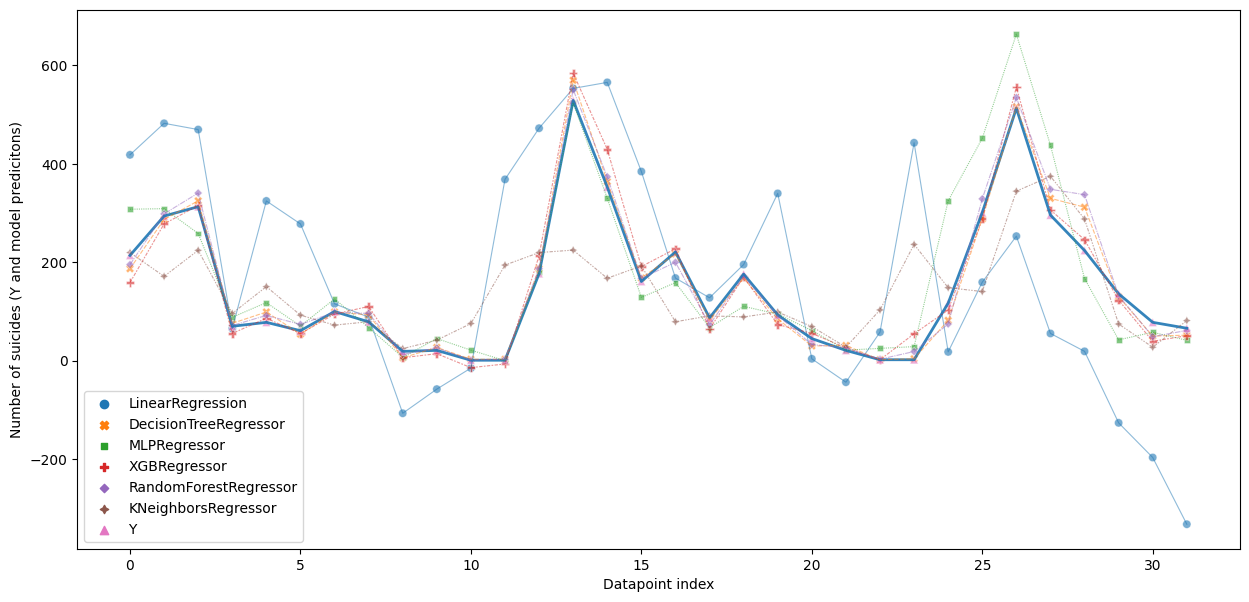

In [10]:
model_analysis.visualize()

## We can save the models to a file to reuse them later without having to retrain them

In [11]:
# model_analysis.save_models()